In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load RF S11 data
with open('fd_data_gen_two_s11.pickle', 'rb') as f:
    s11_data = pickle.load(f)

# Load metadata
with open('metadata_gen_two.pickle', 'rb') as f:
    metadata = pickle.load(f)

print(type(s11_data))
print(type(metadata))


<class 'numpy.ndarray'>
<class 'list'>


In [5]:
print(np.array(s11_data).shape)

(1301, 1001, 72)


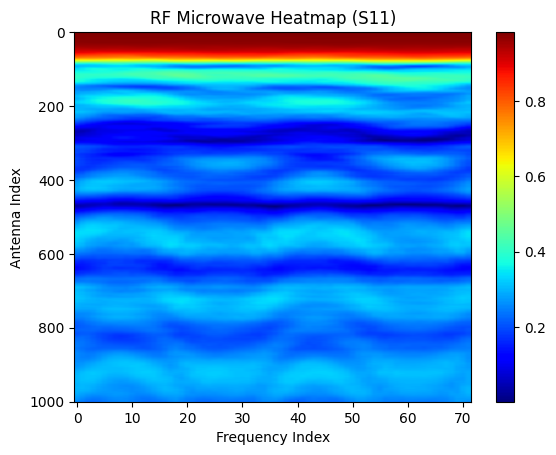

In [6]:
# Take one RF sample
sample = np.abs(s11_data[0])

plt.imshow(sample, aspect='auto', cmap='jet')
plt.colorbar()
plt.title("RF Microwave Heatmap (S11)")
plt.xlabel("Frequency Index")
plt.ylabel("Antenna Index")
plt.show()


In [8]:
# Inspect metadata structure
print(type(metadata))
metadata[0]


<class 'list'>


{np.str_('n_expt'): 1,
 np.str_('id'): 1,
 np.str_('phant_id'): 'A11F14',
 np.str_('tum_rad'): nan,
 np.str_('tum_shape'): '',
 np.str_('tum_x'): nan,
 np.str_('tum_y'): nan,
 np.str_('tum_z'): nan,
 np.str_('birads'): 4,
 np.str_('adi_ref_id'): nan,
 np.str_('emp_ref_id'): 6,
 np.str_('date'): '2019-09-07',
 np.str_('n_session'): 1,
 np.str_('ant_rad'): 21.0,
 np.str_('ant_z'): -6.51,
 np.str_('fib_ang'): 0.0,
 np.str_('adi_x'): 0.0,
 np.str_('adi_y'): 0.0,
 np.str_('fib_ref_id'): nan,
 np.str_('fib_x'): 0.0,
 np.str_('fib_y'): 0.0,
 np.str_('tum_in_fib'): nan}

In [9]:
import numpy as np
import math

labels = []

for m in metadata:
    tum_rad = m.get(np.str_('tum_rad'))
    if tum_rad is not None and not (isinstance(tum_rad, float) and math.isnan(tum_rad)):
        labels.append(1)  # cancer
    else:
        labels.append(0)  # normal

labels = np.array(labels)

print("Total samples:", len(labels))
print("Cancer samples:", np.sum(labels))
print("Normal samples:", len(labels) - np.sum(labels))


Total samples: 1301
Cancer samples: 504
Normal samples: 797


In [10]:
labels.shape

(1301,)

In [12]:
import os
print(os.getcwd())

c:\Users\SHYAM PRASATH\Downloads\Prajan Final Year Project


In [13]:
import os

base_dir = 'rf_dataset'
cancer_dir = os.path.join(base_dir, 'cancer')
normal_dir = os.path.join(base_dir, 'normal')

os.makedirs(cancer_dir, exist_ok=True)
os.makedirs(normal_dir, exist_ok=True)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(s11_data)):
    rf_sample = np.abs(s11_data[i])

    plt.figure(figsize=(6, 4))
    plt.imshow(rf_sample, aspect='auto', cmap='jet')
    plt.axis('off')

    if labels[i] == 1:
        save_path = os.path.join(cancer_dir, f'rf_{i}.png')
    else:
        save_path = os.path.join(normal_dir, f'rf_{i}.png')

    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

    if i % 200 == 0:
        print(f"Saved {i} images")


Saved 0 images
Saved 200 images
Saved 400 images
Saved 600 images
Saved 800 images
Saved 1000 images
Saved 1200 images


In [15]:
len(os.listdir(cancer_dir)), len(os.listdir(normal_dir))

(504, 797)

In [16]:
import tensorflow as tf

# Load trained model
model = tf.keras.models.load_model('rf_microwave_breast_cancer_model.h5')

print("Model loaded successfully")
model.summary()


Model loaded successfully


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,091 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = 'rf_dataset'
img_size = (224, 224)
batch_size = 16

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 259 images belonging to 2 classes.


In [21]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.5830 - loss: 0.8412
Validation Accuracy: 58.30%


In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred_prob = model.predict(val_data)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

y_true = val_data.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Detailed report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Cancer']))


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step
Confusion Matrix:
 [[ 49  51]
 [ 57 102]]

Classification Report:

              precision    recall  f1-score   support

      Normal       0.46      0.49      0.48       100
      Cancer       0.67      0.64      0.65       159

    accuracy                           0.58       259
   macro avg       0.56      0.57      0.56       259
weighted avg       0.59      0.58      0.59       259



In [24]:
from tensorflow.keras.preprocessing import image

img_path = 'rf_dataset/cancer/rf_110.png'  # example image

img = image.load_img(img_path, target_size=img_size)
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)[0][0]

if prediction > 0.5:
    print("Prediction: CANCER detected")
else:
    print("Prediction: NORMAL")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Prediction: CANCER detected


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
model = load_model("rf_microwave_breast_cancer_model.h5")
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "rf_dataset",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)
y_true = test_generator.classes

y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)


Found 1301 images belonging to 2 classes.
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 375ms/step


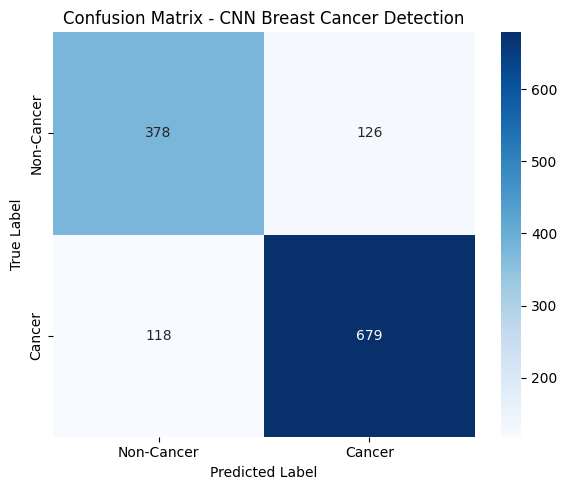

In [4]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-Cancer", "Cancer"],
    yticklabels=["Non-Cancer", "Cancer"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN Breast Cancer Detection")

plt.tight_layout()
plt.savefig("results/confusion-matrix.png", dpi=300)
plt.show()